# Imported files

In [62]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Inserting csv file

In [7]:
df = pd.read_csv('UpdatedResumeDataSet.csv')
df.head()

,Category,Resume
0,Data Science,Skills * Programming Languages: Python (pandas...
1,Data Science,Education Details \r\nMay 2013 to May 2017 B.E...
2,Data Science,"Areas of Interest Deep Learning, Control Syste..."
3,Data Science,Skills â¢ R â¢ Python â¢ SAP HANA â¢ Table...
4,Data Science,"Education Details \r\n MCA YMCAUST, Faridab..."


In [8]:
df.shape

(962, 2)

# Categorizing data

In [9]:
df['Category']

0      Data Science
1      Data Science
2      Data Science
3      Data Science
4      Data Science
           ...     
957         Testing
958         Testing
959         Testing
960         Testing
961         Testing
Name: Category, Length: 962, dtype: object

In [10]:
df['Category'].value_counts()

Category
Java Developer               84
Testing                      70
DevOps Engineer              55
Python Developer             48
Web Designing                45
HR                           44
Hadoop                       42
Sales                        40
Data Science                 40
Mechanical Engineer          40
ETL Developer                40
Blockchain                   40
Operations Manager           40
Arts                         36
Database                     33
Health and fitness           30
PMO                          30
Electrical Engineering       30
Business Analyst             28
DotNet Developer             28
Automation Testing           26
Network Security Engineer    25
Civil Engineer               24
SAP Developer                24
Advocate                     20
Name: count, dtype: int64

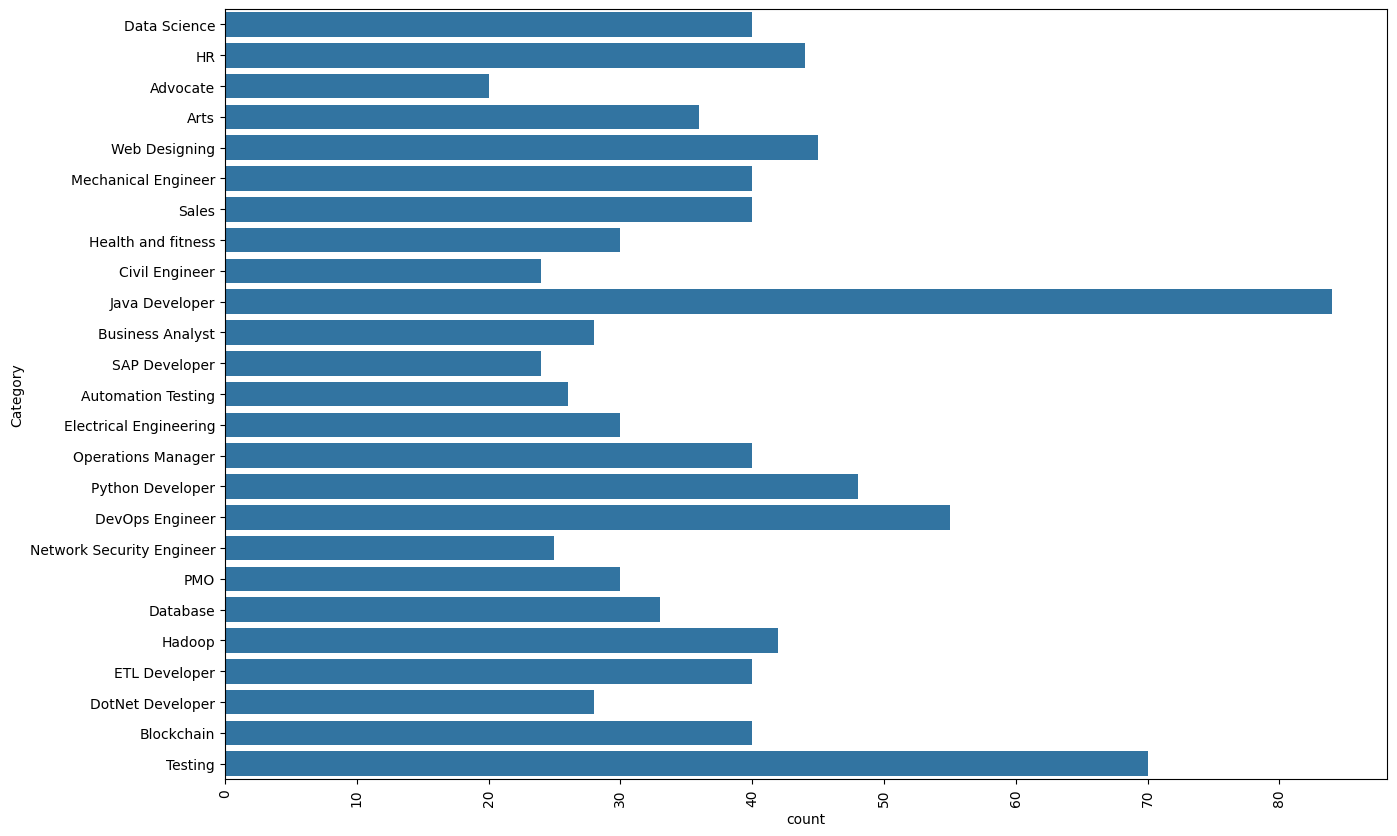

In [39]:
plt.figure(figsize=(15,10))
sns.countplot(df['Category'])
plt.xticks(rotation = 90)
plt.show()

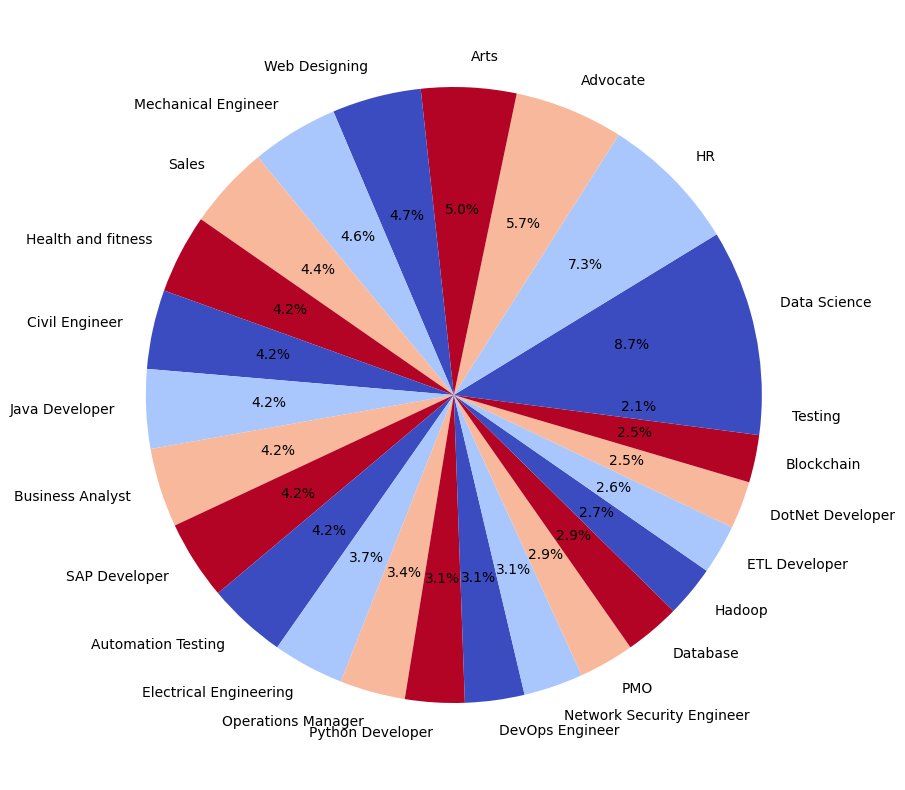

In [58]:
x = df['Category'].value_counts()
y = df['Category'].unique()
plt.figure(figsize=(15,10))

plt.pie(x,labels=y,autopct='%1.1f%%', colors=plt.cm.coolwarm(np.linspace(0,1,4)))
plt.show()

In [80]:
df['Resume'][0]

'Skills * Programming Languages: Python (pandas, numpy, scipy, scikit-learn, matplotlib), Sql, Java, JavaScript/JQuery. * Machine learning: Regression, SVM, NaÃ¯ve Bayes, KNN, Random Forest, Decision Trees, Boosting techniques, Cluster Analysis, Word Embedding, Sentiment Analysis, Natural Language processing, Dimensionality reduction, Topic Modelling (LDA, NMF), PCA & Neural Nets. * Database Visualizations: Mysql, SqlServer, Cassandra, Hbase, ElasticSearch D3.js, DC.js, Plotly, kibana, matplotlib, ggplot, Tableau. * Others: Regular Expression, HTML, CSS, Angular 6, Logstash, Kafka, Python Flask, Git, Docker, computer vision - Open CV and understanding of Deep learning.Education Details \r\n\r\nData Science Assurance Associate \r\n\r\nData Science Assurance Associate - Ernst & Young LLP\r\nSkill Details \r\nJAVASCRIPT- Exprience - 24 months\r\njQuery- Exprience - 24 months\r\nPython- Exprience - 24 monthsCompany Details \r\ncompany - Ernst & Young LLP\r\ndescription - Fraud Investigatio

# Cleaning data
1. Urls
2. Hashtags
3. Mentions
4. Sepcial Letters
5. Punctuations

In [87]:
import re

def CleanResume(txt):
    CleanedTXT = re.sub(r'http\S+\b',' ',txt)  
    CleanedTXT = re.sub(r'@\S+\b',' ',CleanedTXT)
    CleanedTXT = re.sub(r'RT|cc',' ',CleanedTXT)
    CleanedTXT = re.sub(r'#\S+',' ',CleanedTXT)
    CleanedTXT = re.sub(r'[%s]' % re.escape("""!$%^&*()_-+={}[]:;"'<,>.?/`~'"""),' ',CleanedTXT)
    CleanedTXT = re.sub(r'\s+',' ',CleanedTXT)
    return CleanedTXT  


In [88]:
resume = "Please visit my #portfolio at http://mywebsite.com, http://myblog.com and @Akshat."
cleaned_resume = CleanResume(resume)
print(cleaned_resume)

Please visit my at and 


In [89]:
df['new'] = df['Resume'].apply(lambda x: CleanResume(x))

In [93]:
df['new'][0]

'Skills Programming Languages Python pandas numpy scipy scikit learn matplotlib Sql Java JavaScript JQuery Machine learning Regression SVM NaÃ¯ve Bayes KNN Random Forest Decision Trees Boosting techniques Cluster Analysis Word Embedding Sentiment Analysis Natural Language processing Dimensionality reduction Topic Modelling LDA NMF PCA Neural Nets Database Visualizations Mysql SqlServer Cassandra Hbase ElasticSearch D3 js DC js Plotly kibana matplotlib ggplot Tableau Others Regular Expression HTML CSS Angular 6 Logstash Kafka Python Flask Git Docker computer vision Open CV and understanding of Deep learning Education Details Data Science Assurance Associate Data Science Assurance Associate Ernst Young LLP Skill Details JAVASCRIPT Exprience 24 months jQuery Exprience 24 months Python Exprience 24 monthsCompany Details company Ernst Young LLP description Fraud Investigations and Dispute Services Assurance TECHNOLOGY ASSISTED REVIEW TAR Technology Assisted Review assists in a elerating the

# Words into categorical values (preprocessing using sklearn)

In [98]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [99]:
le.fit(df['Category'])
df['Category'] = le.transform(df['Category'])

In [102]:
df.Category.unique()

array([ 6, 12,  0,  1, 24, 16, 22, 14,  5, 15,  4, 21,  2, 11, 18, 20,  8,
       17, 19,  7, 13, 10,  9,  3, 23])

# Vactorization

In [104]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer(stop_words= 'english')

In [108]:
tfidf.fit(df['new'])
vactorizedtxt = tfidf.transform(df['new'])

In [110]:
print(vactorizedtxt)

<Compressed Sparse Row sparse matrix of dtype 'float64'
	with 164347 stored elements and shape (962, 7382)>
  Coords	Values
  (0, 118)	0.06309716829673218
  (0, 286)	0.03007033236588397
  (0, 315)	0.04529282661236908
  (0, 344)	0.028634626250471872
  (0, 483)	0.1373343273795929
  (0, 486)	0.0767602348740478
  (0, 489)	0.1530652110646241
  (0, 494)	0.020496250528059035
  (0, 501)	0.02560543932796158
  (0, 512)	0.04529282661236908
  (0, 515)	0.03643934432415505
  (0, 626)	0.04529282661236908
  (0, 652)	0.07917736197354959
  (0, 654)	0.028350881471600614
  (0, 655)	0.0746896903086583
  (0, 656)	0.0661849292348697
  (0, 661)	0.10473184517253178
  (0, 679)	0.036877937060708056
  (0, 716)	0.026848701095284765
  (0, 719)	0.03425247386080087
  (0, 811)	0.015137610625985282
  (0, 823)	0.07917736197354959
  (0, 858)	0.02347674488340348
  (0, 911)	0.04529282661236908
  (0, 946)	0.04529282661236908
  :	:
  (961, 5927)	0.03998842198736853
  (961, 5978)	0.035534673063154935
  (961, 5993)	0.045673854

# Splitting Data (x = input, y = output)

In [111]:
from sklearn.model_selection import train_test_split

In [112]:
X_train, X_test, y_train, y_test = train_test_split(vactorizedtxt, df['Category'], test_size=0.2, random_state=42)

In [117]:
X_train.shape


(769, 7382)

In [119]:
X_test.shape

(193, 7382)

# Training Model and print classification report

In [124]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.multiclass import OneVsRestClassifier
from sklearn.metrics import accuracy_score

In [128]:
clf = OneVsRestClassifier(KNeighborsClassifier())
clf.fit(X_train,y_train)
ypred = clf.predict(X_test)
print(ypred)
print(ypredWO)

[15 15 15 13 14 17 16  2  0 14 13 12 16 23 20  5  6  4 10  9 19  1 10 23
 23 21 22 22  2 12 18  1  8 24 11 23  7 12 24  8 18  6  8 19 24 23 21  1
 15  4 15 22 11  5 15 13  1 19  5 12 22 22 20 24 21 18 12 10 10 20 10  8
  9 21 17 21  0 17 16 14 15 11 11  8 20  3 19  8  0  2  9 10  2 23 20 20
 23 12 18 12  7 16  8 14 18  3 14 19 14 14 15 18  8  2 21 18 23 10 23  5
 11 15 12  3  5  3  7 12 19  8 20 19  3 15  9 19  1 23 21  5 20 15 16  7
  7  8 15 18  1 15 13 20  7  4 18 11  5 15  5 12  9 22 18 21  8 23  4 12
 24 16 15 22  8 22  3 16 23 23 12  7 16 18  5  3 18  8 23 23 20 21  6  7
 23]
[15 15 15 13 14 17 16  2  0 14 13 12 16 23 20  5  6  4 10  9 19  1 10 23
 23 21 22 22  2 12 18  1  8 24 11 23  7 12 24  8 18  6  8 19 24 23 21  1
 15  4 15 22 11  5 15 13  1 19  5 12 22 22 20 24 21 18 12 10 10 20 10  8
  9 21 17 21  0 17 16 14 15 11 11  8 20  3 19  8  0  2  9 10  2 23 20 20
 23 12 18 12  7 16  8 14 18  3 14 19 14 14 15 18  8  2 21 18 23 10 23  5
 11 15 12  3  5  3  7 12 19  8 20 19  3 15  9 

# Accuracy check

In [130]:
print(accuracy_score(y_test,ypredWO))
print(accuracy_score(y_test,ypred))


0.9844559585492227
0.9844559585492227


# Implimentation in website (Prediction Check)

In [131]:
import pickle

In [132]:
pickle.dump(tfidf,open('tfidf.pkl','wb'))
pickle.dump(clf,open('clf.pkl','wb'))

In [ ]:
clf = pickle.load(open('clf.pkl',rb))

cleaned_resume = CleanResume(myresume)

input_feature = tfidf.transform